# CSE 158, Fall 2019: Homework 3

**Name:** CUI, HONGJIAN &ensp;&ensp;&ensp;&ensp; **PID:** U08398995 

## Tasks (Read prediction):

### Question 1:

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import random
from collections import defaultdict

In [2]:
path = "/home/cui/Projects/PycharmProjects/CSE-158/data/train_Interactions.csv"
file = open(path, 'rt')

In [3]:
header = file.readline()
header = header.strip().split(',')

In [4]:
dataset = []

In [5]:
for line in file:
    fields = line.strip().split(',')
    d = dict(zip(header, fields))
    d['rating'] = int(d['rating'])
    dataset.append(d)

In [6]:
dataset[0]

{'userID': 'u79354815', 'bookID': 'b14275065', 'rating': 4}

In [7]:
X = [[d['userID'], d['bookID'], 1] for d in dataset]

In [8]:
split = 190000
X_training = X[:split]
X_valid = X[split:]

In [9]:
X_valid[0]

['u35176258', 'b30592470', 1]

In [10]:
usersPerBook = defaultdict(set)
booksPerUser = defaultdict(set)
bookSets = set()

In [11]:
for d in dataset:
    user, book = d['userID'], d['bookID']
    usersPerBook[book].add(user)
    booksPerUser[user].add(book)
    bookSets.add(book)

In [12]:
len(bookSets)

7170

In [13]:
len(booksPerUser)

11357

In [14]:
valid_user = [d[0] for d in X_valid]

In [15]:
for user in valid_user:
    booksNotReadSet = bookSets - booksPerUser.get(user)
    book = random.choice(list(booksNotReadSet))
    X_valid.append([user, book, 0])

In [16]:
len(X_valid)

20000

In [17]:
X_valid[0]

['u35176258', 'b30592470', 1]

In [18]:
# random.shuffle(X_valid)

In [19]:
X_valid[0]

['u35176258', 'b30592470', 1]

In [20]:
y_valid = [d[2] for d in X_valid]
X_valid = [[d[0], d[1]] for d in X_valid]

In [21]:
# Baseline model
bookCount = defaultdict(int)
totalRead = 0

for d in dataset:
    bookCount[d['bookID']] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalRead / 2: break
    
prediction = []    
for l in X_valid:
    if l[1] in return1:
        prediction.append(1)
    else:
        prediction.append(0)

In [22]:
correctPredictionValid = np.array(prediction) == np.array(y_valid)

In [23]:
sum(correctPredictionValid) / len(correctPredictionValid)

0.6471

### Question 2:

In [24]:
# Baseline model - different threshold
bookCount = defaultdict(int)
totalRead = 0

for d in dataset:
    bookCount[d['bookID']] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
threshold = 0.01
accuracyList = []

for n in range(100):
    for ic, i in mostPopular:
        count += ic
        return1.add(i)
        if count > totalRead * threshold * (n + 1): break
    
    prediction = []    
    for l in X_valid:
        if l[1] in return1:
            prediction.append(1)
        else:
            prediction.append(0)
    
    correctPredictionValid = np.array(prediction) == np.array(y_valid)
    accuracy = sum(correctPredictionValid) / len(correctPredictionValid)
    accuracyList.append([round(threshold * (n + 1), 2), accuracy])
    
    return1 = set()
    count = 0

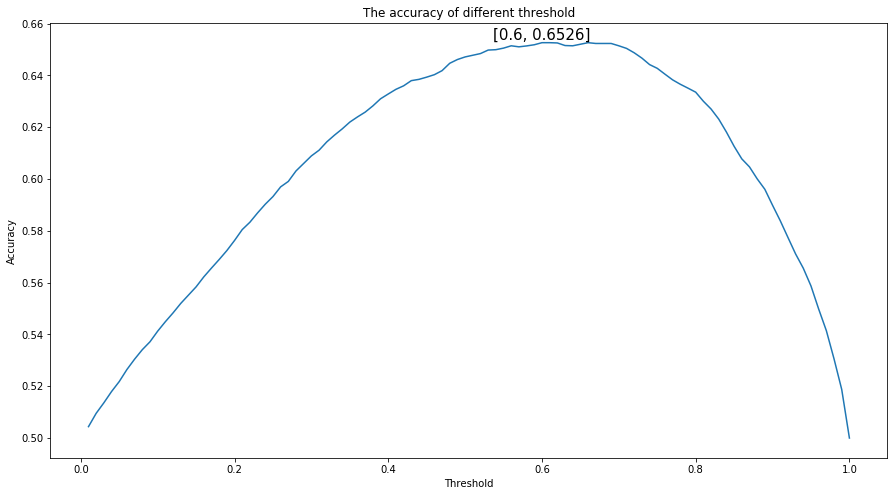

In [25]:
x_plt = [d[0] for d in accuracyList]
y_plt = [d[1] for d in accuracyList]

plt.figure(figsize=(15,8))

plt.plot(x_plt, y_plt)
y_max = max(y_plt)
x_max = x_plt[y_plt.index(y_max)]
plt.text(x_max, y_max, [x_max, y_max],ha='center', va='bottom', fontsize=15)

plt.title("The accuracy of different threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

### Question 3:

In [26]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [27]:
def mostSimilar(u, b):
    similarities = []
    books = booksPerUser[u]
    for b2 in books:
        if b2 == b:continue
        sim = Jaccard(usersPerBook[b], usersPerBook[b2])
        similarities.append(sim)
    similarities.sort(reverse=True)
    return similarities[:10]

In [28]:
mostSimilar(X_valid[0][0], X_valid[0][1])

[0.03418803418803419,
 0.01904761904761905,
 0.016129032258064516,
 0.011904761904761904,
 0.00980392156862745,
 0.008695652173913044,
 0.007751937984496124,
 0.006896551724137931,
 0.006802721088435374,
 0.006578947368421052]

In [29]:
# Baseline model - Jaccard similarity
accuracyList = []
threshold = 0.005

for n in range(0, 20):
    mostSimilarList = []
    prediction = []  
    
    for d in X_valid:
        mostSimilarList = mostSimilar(d[0], d[1])
        
        if mostSimilarList[0] >= threshold * (n + 1):
            prediction.append(1)
        else:
            prediction.append(0)
    
    correctPredictionValid = np.array(prediction) == np.array(y_valid)
    accuracy = sum(correctPredictionValid) / len(correctPredictionValid)
    accuracyList.append([threshold * (n + 1), accuracy])

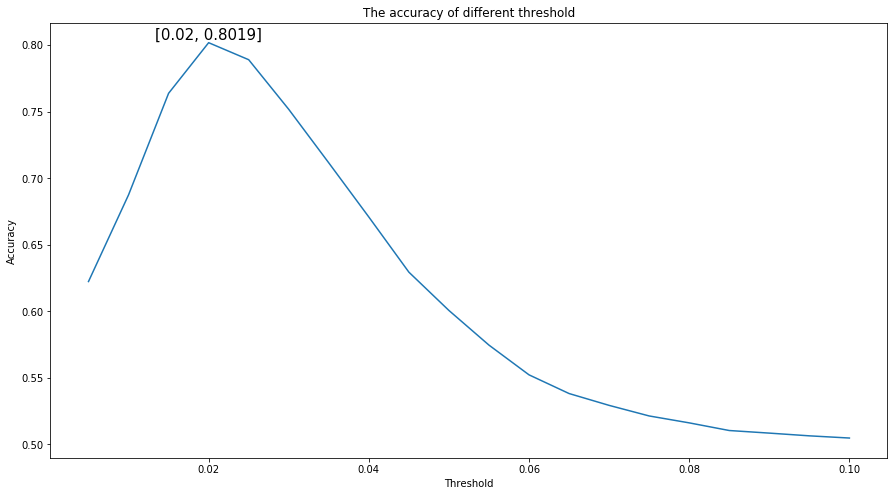

In [30]:
x_plt = [d[0] for d in accuracyList]
y_plt = [d[1] for d in accuracyList]

plt.figure(figsize=(15,8))

plt.plot(x_plt, y_plt)
y_max = max(y_plt)
x_max = x_plt[y_plt.index(y_max)]
plt.text(x_max, y_max, [x_max, y_max],ha='center', va='bottom', fontsize=15)

plt.title("The accuracy of different threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

### Question 4:

In [31]:
bookCount = defaultdict(int)
totalRead = 0

for d in dataset:
    bookCount[d['bookID']] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
threshold_popularity = 0.6
threshold_jaccard = 0.02

for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalRead * threshold_popularity: break
    
prediction = []
mostSimilarList = []
    
for l in X_valid:
    mostSimilarList = mostSimilar(l[0], l[1])
            
    if l[1] in return1 or mostSimilarList[0] >= threshold_jaccard:
        prediction.append(1)
    else:
        prediction.append(0)
    
correctPredictionValid = np.array(prediction) == np.array(y_valid)
accuracy = sum(correctPredictionValid) / len(correctPredictionValid)

In [32]:
accuracy

0.7493

### Question 5:

**Username: jameschoe**
**Display Name: CUI, HONGJIAN **

In [33]:
bookCount = defaultdict(int)
totalRead = 0

for d in dataset:
    bookCount[d['bookID']] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
threshold_popularity = 0.6
threshold_jaccard = 0.02

for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalRead * threshold_popularity: break
    
mostSimilarList = []
predictions = open("/home/cui/Projects/PycharmProjects/CSE-158/data/predictions_Read.txt", 'w')

for l in open("/home/cui/Projects/PycharmProjects/CSE-158/data/pairs_Read.txt"):
    if l.startswith("userID"):
        #header
        predictions.write(l)
        continue
    u,b = l.strip().split('-')
    mostSimilarList = mostSimilar(u, b)
    if b in return1 or mostSimilarList[0] >= threshold_jaccard:
        predictions.write(u + '-' + b + ",1\n")
    else:
        predictions.write(u + '-' + b + ",0\n")

predictions.close()